# K-means: warm-up

In this first exercice, you will __Apply K-means__ in a 2D dataset to help gain an intuition of how the algorithm works

## 1. Generate & Plot Test Data

[`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) is an `sklearn` method that uses a Gaussian equation to generate separable datasets for clustering or classification.

👉Use it to generate some test data (X, y) with the following parameters:
- 500 data points
- 4 classes (or clusters)
- `random_state`=42

Plot what your data looks like (it should be 4 distinct clusters of data).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
random_state=42

In [2]:
blobs = make_blobs(n_samples=500, centers=4, random_state=42) 

In [3]:
import numpy as np
blobs_plot = np.array(blobs[0])

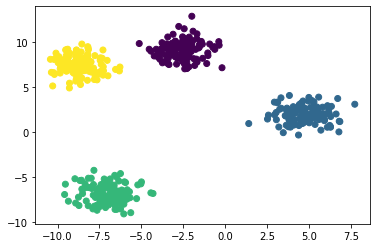

In [4]:
import matplotlib.pyplot as plt
plt.scatter(blobs_plot[:,0], blobs_plot[:,1], c=blobs[1])

To summarize, 

1. You've created a fake dataset X, with no target at all (no supervision with a `y` vector).

2. This dataset has 500 observations, and 2 dimensions (or features), which are represented as two-dimensional positions on the plot you just made.

3. This dataset still has a structure, which is 4 clusters in our case with different centers (or `centroids`)

## 2. Apply K-means

Your goal is to find automatically the clusters that gives you the inherent structure of your data. Those clusters are only represented by their center.

What you have to determine though, is the __number of clusters__ that you think the data has.

[`sklearn` has a `KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) package that does the math for you. 

👉Import `KMeans` from `sklearn` and initiate a model with the follwing parameters:
- `n_clusters=2`,
- `random_state=42`

👉Then, fit the created data to the model, using `fit_predict`, which both fits the Kmeans model AND predicts back on the observations. 
**It hence returns an array of cluster index assignment for every observation in X**

In [5]:
from sklearn.cluster import KMeans
Km = KMeans(n_clusters = 2, random_state = 42)

You can now plot the prediction of clusters that KMeans gives you. In order to have a better overview of what the KMeans has found as clusters (here only 2), we want to color every observation with a distinct color corresponing to a different cluster. 

👉In order to do that, just plot your scattered observations, and pass the prediction vector that you just got as the color of the observation using `c=prediction_vector` argument

In [6]:
import pandas as pd
blob = pd.DataFrame(blobs[0], columns = ['x', 'y'])
blob

,x,y
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185
...,...,...
495,-7.438972,8.248157
496,-2.586299,9.355438
497,-7.215412,-5.211088
498,-7.402350,-5.831100


In [7]:
Km.fit(blob)

KMeans(n_clusters=2, random_state=42)

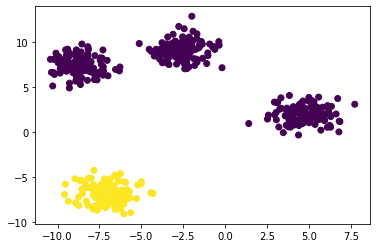

In [8]:
plt.scatter(blob['x'], blob['y'], c=Km.labels_)

In [9]:
km2 = KMeans(algorithm = 'elkan')
km2.fit(blob)
km2.cluster_centers_

array([[-2.16865581,  9.89890113],
       [-6.66799492, -7.49757841],
       [ 4.03998071,  1.87125995],
       [-8.82714344,  8.16745967],
       [-2.96564037,  8.41642671],
       [ 5.74459034,  2.00274908],
       [-8.49009266,  6.51929399],
       [-7.53510425, -5.95299281]])

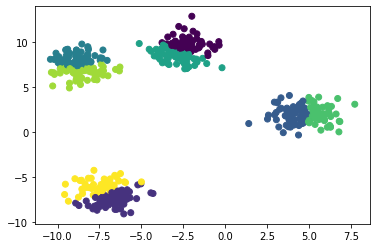

In [10]:
plt.scatter(blob['x'], blob['y'], c=km2.labels_)

As you must see, the KMeans has found 2 clusters as required. It's not the modeling we want. We want to find the optimal number of clusters that represents our data the best. How do we find that optimal number of clusters?

## 3. Find the Appropriate Number of Clusters

We can use two techniques to find the appropriate number of clusters. 

You have to know that the Kmeans also returns a property named `inertia_` that **returns the sum of squared distances of samples to their closest cluster center**. 

It can serve as an indicator to determine how much we have of **variance explained** the data by the found clusters. 

### The Elbow Method

This is a technique that is used to help us find the appropriate number of cluster in K-Means. 

This method looks at the percentage of variance explained as a function of the number of clusters: one should choose a number of clusters so that __adding another cluster doesn't give much better modeling of the data__ (the marginal gain drops, giving an angle in the graph). Hence the "elbow criterion". 

NB: This "elbow" cannot always be unambiguously identified.

👉__To do that, you want to `fit` a KMeans for every number of cluster between 1 and 10, and save the explained variance__

In [11]:
# Apply the elbow method to find the optimal number of clusters.
Km.inertia_

15737.083577864998

Then, you want to plot the inertias as a function of the number of clusters.

In [12]:
X = np.arange(1,11,1)
inertia_list = []
for i in range(1,11):
    km = KMeans(n_clusters=int(i))
    km.fit(blob)
    inertia_list.append(km.inertia_)

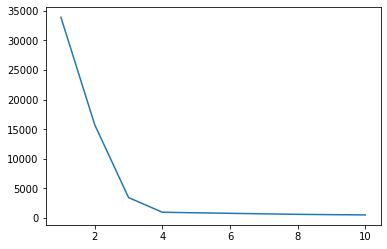

In [13]:
plt.plot(X, inertia_list)

You should see an "elbow" where the inertia stops dropping dramatically at 4 (since we generated that data, we know it's the right answer 😉).

### Hierarchical Clustering

From the previous Elbow Method we can say that the optimal clusters are 4. This can also be confirmed by another statistical technique called [Hierarchical Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering).

👉 Using [`scipy.cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html), **plot the dendogram linkage** of the hierarchical clustering using the 'ward' method, that minimizes the within-cluster variance. You should get 4 clusters as well. 




<details>
    <summary>Solution if needed</summary>

```python
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20, 10))
dendrogram(linkage(X, method='ward'))
plt.show()
```
</details>


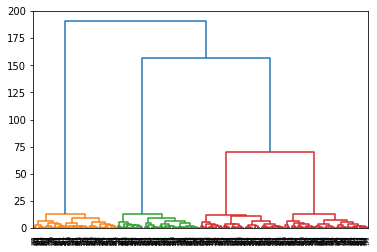

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram(linkage(blob, method='ward'))
plt.show()

## 4. Fit K-Means with 4 Optimal Clusters

Now that we have found the optimal number of clusters, we can go on and fit a KMeans with 4 clusters over our observations. Scatter plot your observations, coloring every computed class with a different color.

In [15]:
Km = KMeans(n_clusters = 4, random_state = 42)
Km.fit(blob)

KMeans(n_clusters=4, random_state=42)

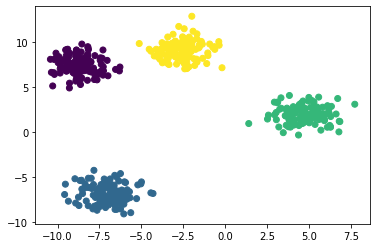

In [16]:
plt.scatter(blob['x'], blob['y'], c=Km.labels_)

**Additional Note:** Does feature scaling always improve the clustering results? 

[Additional learning](https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering)

🏁 Well done with your first challenge! **Don't forget to push your notebook.**